In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file and store it in the prod_sales dataframe
prod_sales = pd.read_csv('./product_sales.csv')

**DATA CLEANING**

In [43]:
# Create a new dataframe called null_rows that contains only the rows where the 'revenue' column is NaN
null_rows = prod_sales[prod_sales['revenue'].isna()]

# Convert the 'sales_method' and 'state' columns in the prod_sales dataframe to the 'category' data type
prod_sales[['sales_method', 'state']] = prod_sales[['sales_method', 'state']].astype('category')

#correcting sales method entry
prod_sales['sales_method'] = prod_sales['sales_method'].replace({'em + call' : 'Email + Call', 'email' : 'Email'})

In [44]:
prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  category
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 735.1+ KB


In [45]:
#cleaning revenue column
#filling null values with 0
prod_sales['revenue'] = prod_sales['revenue'].fillna(0)

In [46]:
prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            15000 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  category
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 735.1+ KB


<AxesSubplot: xlabel='years_as_customer'>

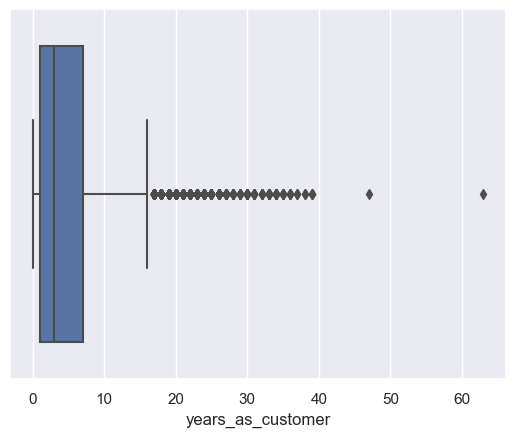

In [47]:
#cleaning years as customer column
sns.boxplot(x=prod_sales['years_as_customer'])

In [48]:
#company was created 39 years ago, anything older than that could be an error in the data
#creating df of outliers in years_as_customer column
years_as_customer_outliers = prod_sales['years_as_customer'] > 39

#dropping rows where years_as_customer is more than 39
prod_sales = prod_sales[~years_as_customer_outliers].copy()

In [68]:
prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               14998 non-null  int64   
 1   sales_method       14998 non-null  category
 2   customer_id        14998 non-null  object  
 3   nb_sold            14998 non-null  int64   
 4   revenue            14998 non-null  float64 
 5   years_as_customer  14998 non-null  int64   
 6   nb_site_visits     14998 non-null  int64   
 7   state              14998 non-null  category
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 852.1+ KB


**CUSTOMER ANALYSIS**

In [50]:
#find duplicates on customer_id
customer_id_duplicates = prod_sales[prod_sales.duplicated(subset='customer_id', keep=False)]

customer_id_duplicates
#no duplicates

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


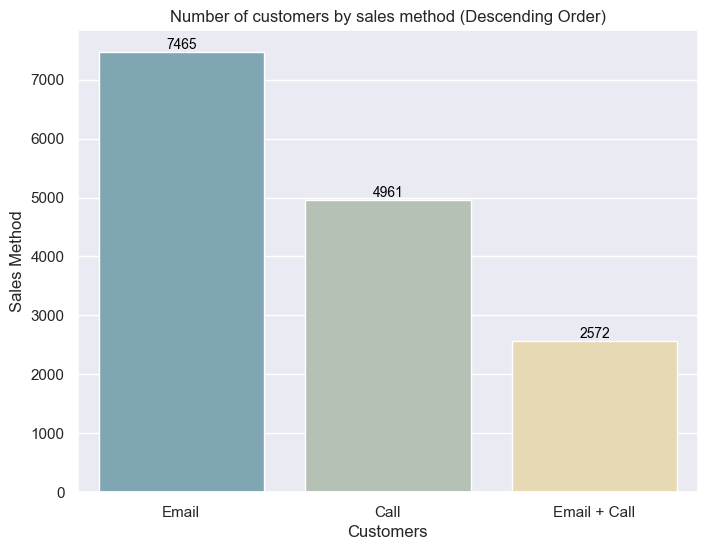

In [51]:
#Plot number of customer for every sales method
cust_by_sales_method = prod_sales.groupby('sales_method')['customer_id'].count().reset_index().set_index('sales_method').sort_values(by='customer_id', ascending=False)

sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))

ax_customer_by_sales_method = sns.barplot(x=cust_by_sales_method.index, y=cust_by_sales_method.customer_id, order=cust_by_sales_method.index, palette="blend:#7AB,#EDA")

#add labels
plt.title('Number of customers by sales method (Descending Order)')
plt.xlabel('Customers')
plt.ylabel('Sales Method')

#add annotations
for p in ax_customer_by_sales_method.patches:
    ax_customer_by_sales_method.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

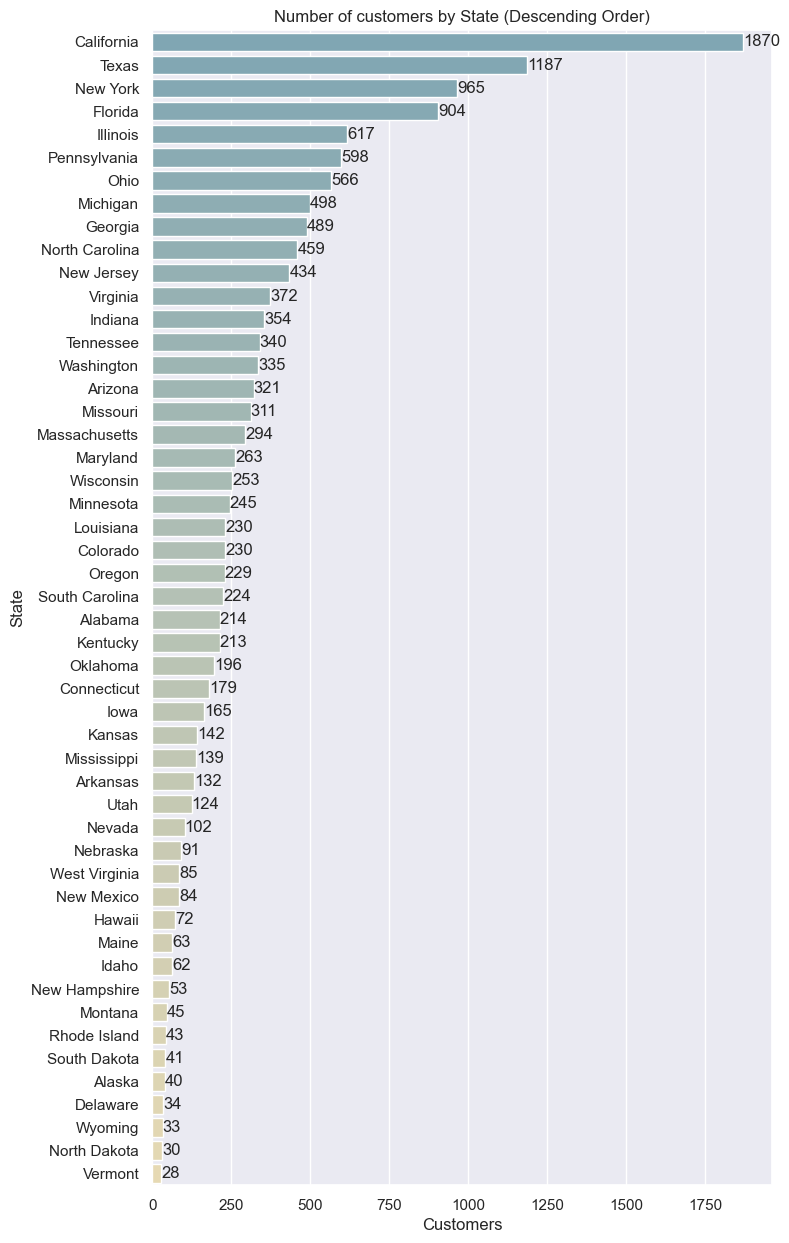

In [52]:
#Plot number of customer for every state
cust_by_sales_method = prod_sales.groupby('state')['customer_id'].count().reset_index().set_index('state').sort_values(by='customer_id', ascending=False)

sns.set(style="darkgrid")

plt.figure(figsize=(8, 15))

ax_customer_by_state = sns.barplot(x=cust_by_sales_method.customer_id, y=cust_by_sales_method.index, orient='h', order=cust_by_sales_method.index, palette="blend:#7AB,#EDA")

#add labels
plt.title('Number of customers by State (Descending Order)')
plt.xlabel('Customers')
plt.ylabel('State')

#add annotations
for p in ax_customer_by_state.patches:
    width = p.get_width()
    plt.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

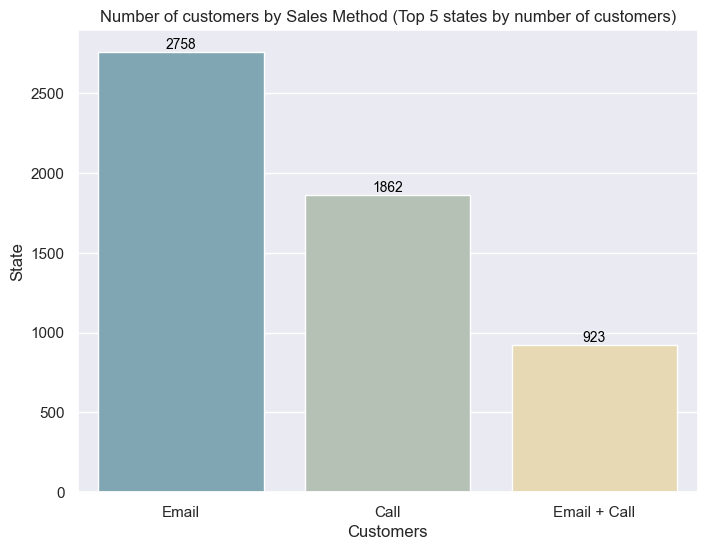

In [53]:
#top 5 states by number of customers
top_5_states_by_customer = prod_sales[prod_sales['state'].isin(['California', 'Texas', 'New York', 'Florida', 'Illinois'])].groupby('sales_method')['customer_id'].count().sort_values(ascending=False)

#number of customers for every sales method in the top 5 states
sns.set(style='darkgrid')

plt.figure(figsize=(8,6))

ax_sales_method_top_5_states = sns.barplot(x=top_5_states_by_customer.index, y=top_5_states_by_customer.values, order=top_5_states_by_customer.index, palette="blend:#7AB,#EDA")

#add labels
plt.title('Number of customers by Sales Method (Top 5 states by number of customers)')
plt.xlabel('Customers')
plt.ylabel('State')

# Add annotations to each bar
for p in ax_sales_method_top_5_states.patches:
    ax_sales_method_top_5_states.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.show()

**REVENUE**

In [54]:
prod_sales['revenue'].describe()

count    14998.000000
mean        87.210983
std         51.728485
min          0.000000
25%         50.602500
50%         87.575000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

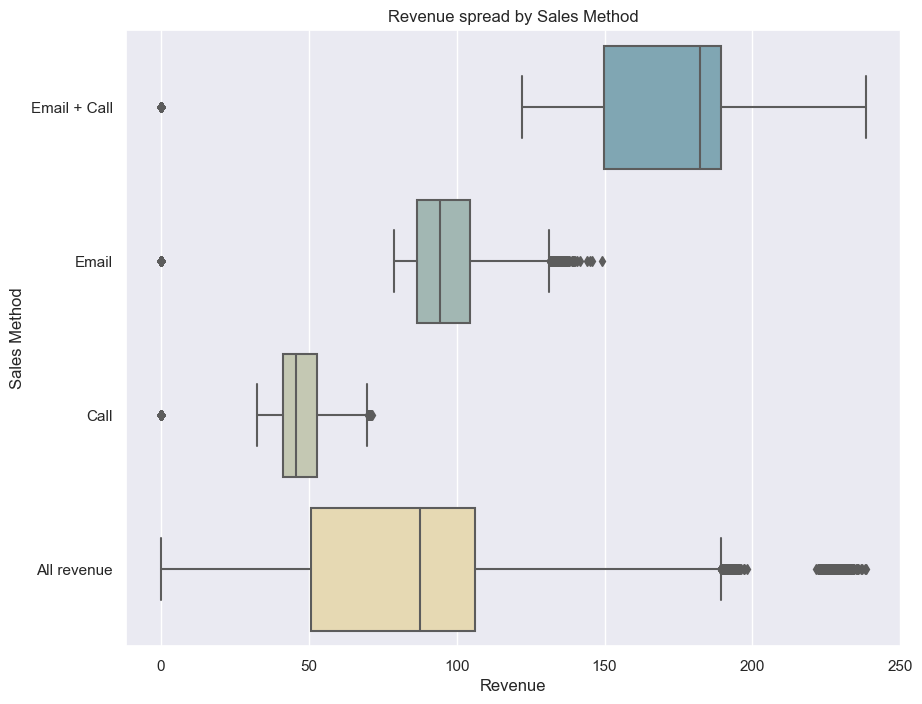

In [55]:
all_revenue = prod_sales.revenue
email_revenue = prod_sales[prod_sales.sales_method == 'Email'].revenue
email_and_call_revenue = prod_sales[prod_sales.sales_method == 'Email + Call'].revenue
call_revenue = prod_sales[prod_sales.sales_method == 'Call'].revenue

data_list = [email_and_call_revenue, email_revenue, call_revenue, all_revenue]
# Create a list of labels for the boxplots
labels = ['Email + Call', 'Email', 'Call', 'All revenue']

def create_horizontal_boxplot(data_list, labels, order=None):
    if order:
        # If order is provided, reorder the data and labels accordingly
        data_list = [data_list[i] for i in order]
        labels = [labels[i] for i in order]

    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data_list, orient="h", palette="blend:#7AB,#EDA")  # Set orient to "h" for horizontal
    plt.yticks(range(len(data_list)), labels)
    plt.ylabel("Sales Method")
    plt.xlabel("Revenue")
    plt.title('Revenue spread by Sales Method')
    plt.show()

# Create the initial horizontal plot
create_horizontal_boxplot(data_list, labels)


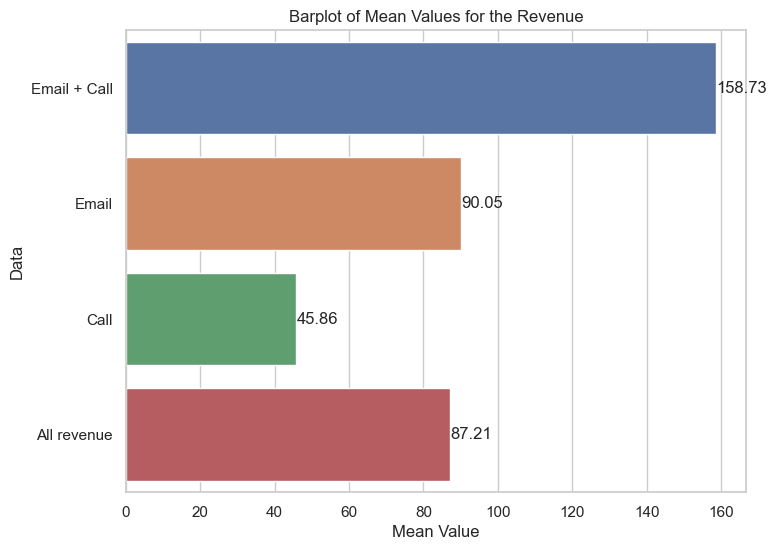

In [56]:
#using revenue mean

data_list_mean = [email_and_call_revenue.mean(), email_revenue.mean(), call_revenue.mean(), all_revenue.mean()]
labels = ['Email + Call', 'Email', 'Call', 'All revenue']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6)) # Added closing parenthesis here
ax_revenue_mean = sns.barplot(x=data_list_mean, y=labels)
plt.xlabel("Mean Value")
plt.ylabel("Data")
plt.title("Barplot of Mean Values for the Revenue")

# Add mean values on top of the bars
for i, mean_value in enumerate(data_list_mean):
    ax_revenue_mean.text(mean_value, i, f'{mean_value:.2f}', va='center')

plt.show()

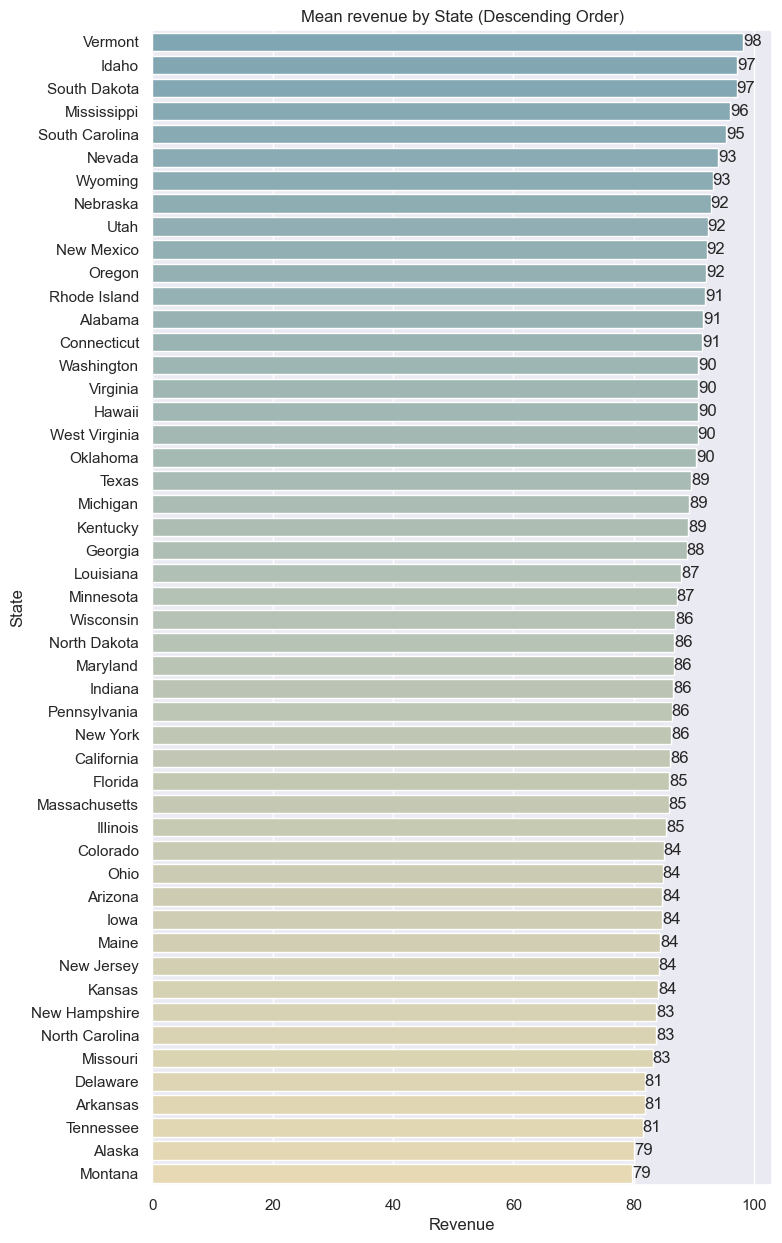

In [57]:
#Plot mean revenue for every state
revenue_by_state = prod_sales.groupby('state')['revenue'].mean().reset_index().set_index('state').sort_values(by='revenue', ascending=False)

sns.set(style="darkgrid")

plt.figure(figsize=(8, 15))

ax_revenue_by_state = sns.barplot(x=revenue_by_state.revenue, y=revenue_by_state.index, orient='h', order=revenue_by_state.index, palette="blend:#7AB,#EDA")

#add labels
plt.title('Mean revenue by State (Descending Order)')
plt.xlabel('Revenue')
plt.ylabel('State')

#add annotations
for p in ax_revenue_by_state.patches:
    width = p.get_width()
    plt.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

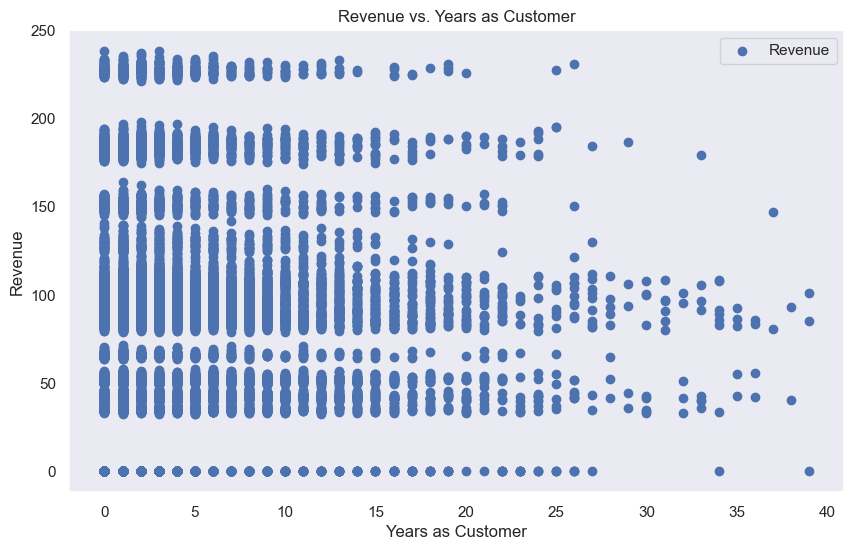

In [58]:
#Revenue over time
plt.figure(figsize=(10, 6))
plt.scatter(prod_sales['years_as_customer'], prod_sales['revenue'], c='b', marker='o', label='Revenue')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.title('Revenue vs. Years as Customer')
plt.legend(loc='best')
plt.grid()
plt.show()

**YEARS AS CUSTOMER**

In [59]:
prod_sales['years_as_customer'].describe()

count    14998.000000
mean         4.959261
std          5.011237
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         39.000000
Name: years_as_customer, dtype: float64

In [60]:
#Revenue variable skewness
prod_sales['revenue'].skew()

0.7383327454230294

In [61]:
#REVENUE
# Calculate the first quartile (Q1) and third quartile (Q3)
revenue_q1 = prod_sales['revenue'].quantile(0.25)
revenue_q3 = prod_sales['revenue'].quantile(0.75)

# Calculate the interquartile range (IQR)
revenue_iqr = revenue_q3 - revenue_q1

# Define a lower bound and upper bound for outliers
revenue_lower_bound = revenue_q1 - 1.5 * revenue_iqr
revenue_upper_bound = revenue_q3 + 1.5 * revenue_iqr

# Find the outliers
revenue_outliers = prod_sales[(prod_sales['revenue'] < revenue_lower_bound) | (prod_sales['revenue'] > revenue_upper_bound)]



In [62]:
#mean number of items sold for outliers in revenue column
revenue_outliers['nb_sold'].mean()

14.533536585365853

In [63]:
#all other rows not considered outliers by revenue
revenue_not_outliers = prod_sales[(prod_sales['revenue'] >= revenue_lower_bound) | (prod_sales['revenue'] <= revenue_upper_bound)]

**SALES METHOD ANALYSIS | REVENUE**

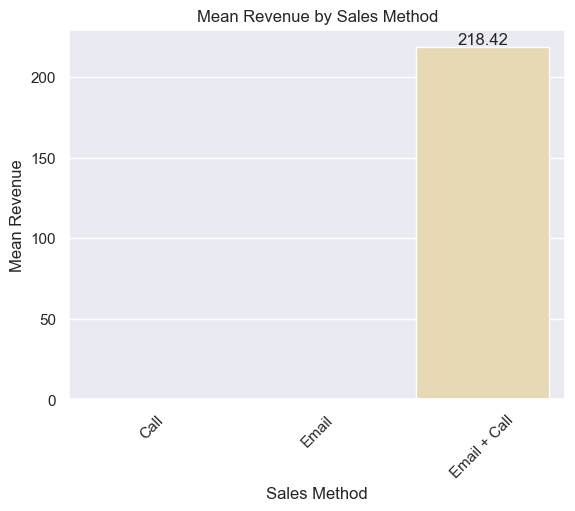

In [64]:
sales_method_o = revenue_outliers.groupby('sales_method')['revenue'].mean().reset_index()


sns.barplot(data=sales_method_o, x='sales_method', y='revenue', palette="blend:#7AB,#EDA")
plt.title('Mean Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Mean Revenue')
plt.xticks(rotation=45)

# Add annotations to the bar plot
for index, row in sales_method_o.iterrows():
    plt.text(index, row['revenue'], round(row['revenue'], 2), ha='center', va='bottom')

plt.show()

**ITEMS SOLD**

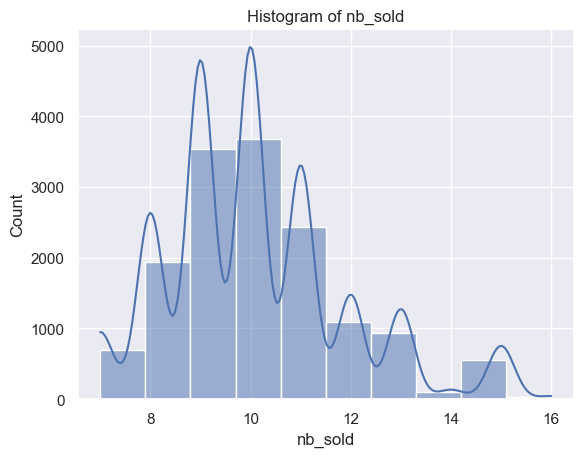

In [65]:
sns.histplot(data=prod_sales, x='nb_sold', kde=True, bins=10)
plt.xlabel('nb_sold')
plt.title('Histogram of nb_sold')
plt.show()

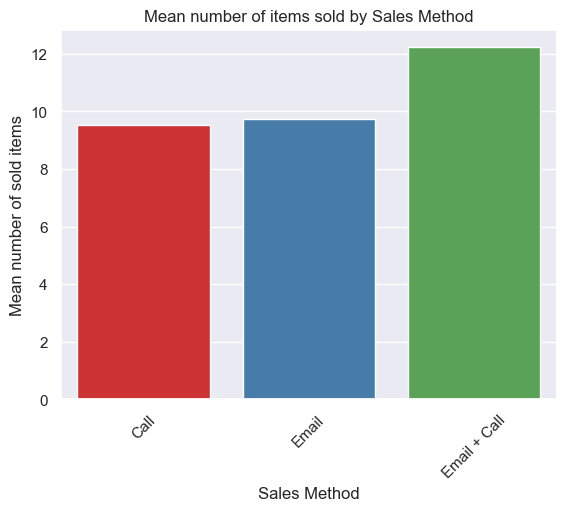

In [66]:
all_sales_method_nb_sold = prod_sales.groupby('sales_method')['nb_sold'].mean().reset_index()

sns.barplot(data=all_sales_method_nb_sold, x='sales_method', y='nb_sold', palette='Set1')
plt.title('Mean number of items sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Mean number of sold items')
plt.xticks(rotation=45)
plt.show()

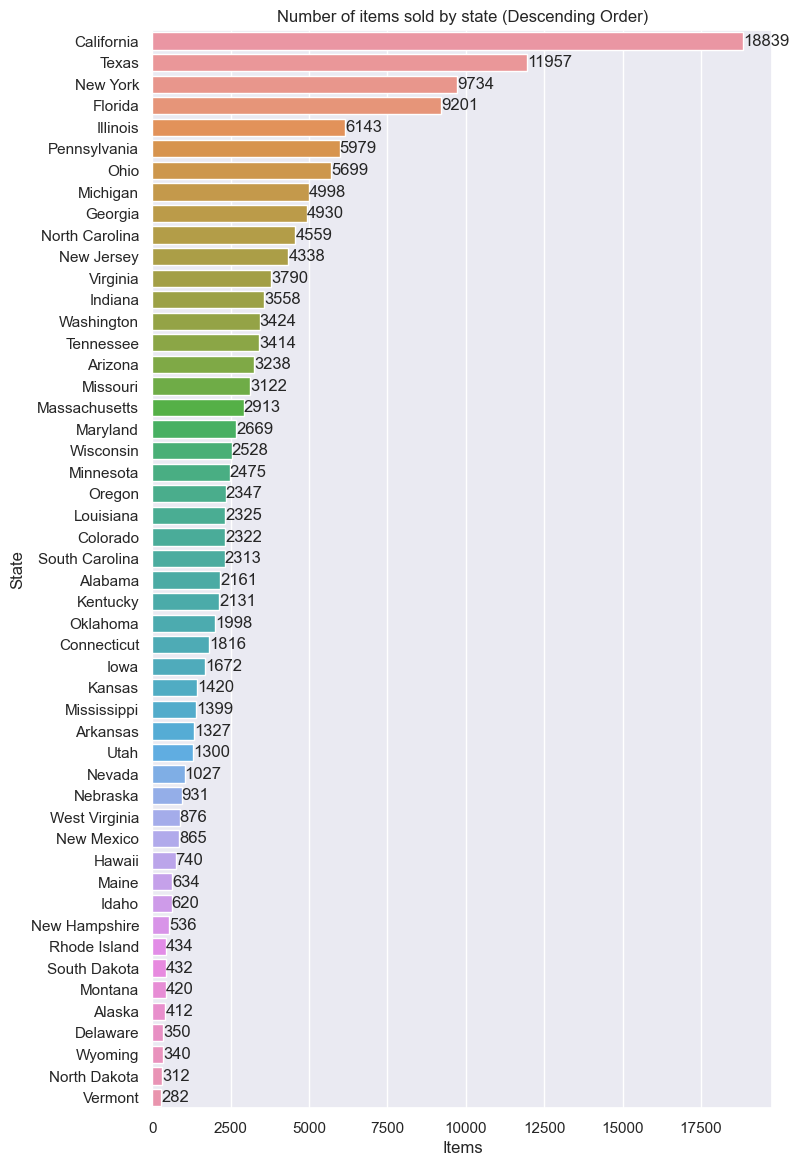

In [67]:
#Number of items sold by state
all_states_nb_sold = prod_sales.groupby('state')['nb_sold'].sum().reset_index().set_index('state').sort_values(by='nb_sold', ascending=False)

sns.set(style="darkgrid")
plt.figure(figsize=(8, 14))

ax = sns.barplot(x=all_states_nb_sold.nb_sold, y=all_states_nb_sold.index, orient='h', order=all_states_nb_sold.index)


plt.title('Number of items sold by state (Descending Order)')
plt.xlabel('Items')
plt.ylabel('State')

for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()
